## Text Analysis and NLP

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Filter warnings
import warnings
warnings.filterwarnings('ignore')

#### Step 1: Basic Setup and NLP

In [4]:
df_small = pd.read_csv('data/df_final.csv', error_bad_lines=False)

In [5]:
df_for_DBSCAN = df_small.query('num_words >= 10')

In [6]:
df_for_DBSCAN = df_for_DBSCAN.sample(frac=.05, random_state=42)

In [7]:
# pd.concat([df1['c'], df2['c']], axis=1, keys=['df1', 'df2'])
df_nlp = pd.concat([df_for_DBSCAN['review_body'], df_for_DBSCAN['sentiment']], 
                   axis=1, keys=['review_body', 'sentiment'])
df_nlp.head(1)

,review_body,sentiment
21571,i bought this amplifier about 2 years ago. bee...,0


In [8]:
X = df_nlp['review_body']
y = df_nlp['sentiment']

X_full = df_small['review_body']
y_full = df_small['star_rating']

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
# 1. Instantiate 
bagofwords = CountVectorizer()

# 2. Fit 
bagofwords.fit(df_nlp["review_body"])

# 3. Transform
X_train = bagofwords.transform(df_nlp["review_body"])
X_train

<4175x11506 sparse matrix of type '<class 'numpy.int64'>'
	with 181333 stored elements in Compressed Sparse Row format>

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

scaler = StandardScaler(with_mean=False)
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [12]:
model = DBSCAN(eps=3, min_samples=2, metric='jaccard')
model.fit(X_train)
y_pred = model.fit_predict(X_train)
c = model.labels_
print(model.labels_) # labels
print(model.core_sample_indices_) #cores
print(f'Number of noise points: {c.shape}')
print(f'Shape of matrix: {X_train.shape}')

ValueError: Metric 'jaccard' not valid for sparse input. Use sorted(sklearn.neighbors.VALID_METRICS_SPARSE['brute']) to get valid options. Metric can also be a callable function.

In [14]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
# Let's now make a document-term matrix that's based on our training data.
# 1. Instantiate
bagofwords = CountVectorizer()

# 2. Fit
bagofwords.fit(X_train)

# 3. Transform
X_train = bagofwords.transform(X_train)
X_train

<2797x9248 sparse matrix of type '<class 'numpy.int64'>'
	with 120164 stored elements in Compressed Sparse Row format>

We know that when we train a model on some training data and want to test the same model, the testing data has to be in the exact same format as the training data. This means that the train and test data have to contain the same features. This means that we have to use the bag-of-words vectorizer fitted to our training data to transform our test data as well.

In [16]:
X_test = bagofwords.transform(X_test)
X_test

<1378x9248 sparse matrix of type '<class 'numpy.int64'>'
	with 58651 stored elements in Compressed Sparse Row format>

In [17]:
# Fitting a model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Training score
logreg.score(X_train,y_train)
# Test Score
logreg.score(X_test, y_test)

0.8831640058055152

Train: 0.9542314054948263
Test: 0.916888932793309

Let's try a KNN model and compare the results

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(X_train, y_train)

print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.7508044333214158
0.7358490566037735


Train: 0.7909598105679717
Test: 0.7864928051631598

In [19]:
word_counts = np.array(np.sum(X_train, axis=0)).reshape((-1,))
word_counts

array([24,  3,  1, ..., 40,  1,  1], dtype=int64)

In [20]:
words = np.array(bagofwords.get_feature_names())
words

array(['00', '000', '0000', ..., 'zune', 'zunes', 'útil'], dtype='<U33')

In [21]:
words_df = pd.DataFrame({"word":words, 
                         "count":word_counts})

words_df.sort_values(by="count", ascending=False).head(10)

,word,count
8180,the,9394
4464,it,5962
732,and,5055
8296,to,4658
4451,is,2894
8214,this,2760
3460,for,2578
5388,my,2401
5625,of,1997
4247,in,1898


In [22]:
# Re-building train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

##### Removing Stop Words

In [23]:
bagofwords2 = CountVectorizer(stop_words="english")

bagofwords2.fit(X_train)
X_train = bagofwords2.transform(X_train) 
X_test = bagofwords2.transform(X_test) 

In [24]:
X_train

<2797x8967 sparse matrix of type '<class 'numpy.int64'>'
	with 67699 stored elements in Compressed Sparse Row format>

In [25]:
word_counts = np.array(np.sum(X_train, axis=0)).reshape((-1,))
words = np.array(bagofwords2.get_feature_names())

words_df = pd.DataFrame({"word":words, 
                         "count":word_counts})
words_df.sort_values(by="count", ascending=False).head(10)

,word,count
3688,great,898
1534,case,813
6108,product,705
3640,good,666
4429,just,617
4663,like,576
8432,use,566
4318,ipod,487
8837,works,434
6064,price,424


In [26]:
# fitting a logistic regression model again
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Training score
logreg.score(X_train, y_train)
# Test Score
logreg.score(X_test,y_test)

0.874455732946299

Train: 0.9545719939018457

Test: 0.9048042411669794

In [27]:
# Next, let's remove infrequent words

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

bagofwords3 = CountVectorizer(stop_words="english", min_df = 5)
bagofwords3.fit(X_train)
X_train = bagofwords3.transform(X_train)
X_test = bagofwords3.transform(X_test)

In [29]:
X_train

<2797x2116 sparse matrix of type '<class 'numpy.int64'>'
	with 57317 stored elements in Compressed Sparse Row format>

In [30]:
# fitting a logistic regression model again
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Training score
print(logreg.score(X_train, y_train))
# Test Score
print(logreg.score(X_test, y_test))

0.9828387558097962
0.8730043541364296


Train: 0.9466898050536833

Test: 0.9043103164411077

In [31]:
coefficients = logreg.coef_
coefficients

array([[-0.01826766, -0.0070816 ,  0.48535615, ..., -0.27485999,
         0.33460924, -0.57720489]])

In [32]:
indices = coefficients.argsort()[0]

In [33]:
# The words with the lowest coefficients 
# most predictive of a 0 (negative review)
np.array(bagofwords3.get_feature_names())[indices[:20]]

array(['broke', 'waste', 'return', 'tried', 'maybe', 'opened', 'stopped',
       'pay', 'worst', 'compatible', 'disappointed', 'weeks', 'terrible',
       'cheaply', 'poorly', 'poor', 'apart', 'horrible', 'distance',
       'returned'], dtype='<U14')

In [34]:
# The words with the highest coefficients
# most predictive of a 1 (positive review)

np.array(bagofwords3.get_feature_names())[indices[-20:]]

array(['simple', 'pleased', 'highly', 'enjoy', 'far', 'works', 'exactly',
       'job', 'awesome', 'easily', 'nice', 'excellent', 'lifeproof',
       'best', 'easy', 'loves', 'love', 'great', 'perfect', 'perfectly'],
      dtype='<U14')

##### Stemming and Lemmatization

Next up, Let's do some Stemming and Lemmatization

In [35]:
import nltk

stemmer = nltk.stem.PorterStemmer()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

bagofwords4 = CountVectorizer(min_df=5, tokenizer = lambda x: [stemmer.stem(i) for i in x.split(' ')], 
                              stop_words='english')
bagofwords4.fit(X_train)

X_train = bagofwords4.transform(X_train)
X_test = bagofwords4.transform(X_test)

X_train

<2797x2203 sparse matrix of type '<class 'numpy.int64'>'
	with 64300 stored elements in Compressed Sparse Row format>

In [37]:
# fitting a logistic regression model again
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Training score
print(logreg.score(X_train,y_train))
# Test Score
print(logreg.score(X_test,y_test))

0.9864140150160887
0.8519593613933236


#### Result: Stemming Score

In [38]:
# Test Score
logreg.score(X_test,y_test)

0.8519593613933236

In [39]:
word_counts = np.array(np.sum(X_train, axis=0)).reshape((-1,))

words = np.array(bagofwords4.get_feature_names())
words_df = pd.DataFrame({"word":words, 
                         "count":word_counts})
words_df.sort_values(by="count", ascending=False).head(10)

,word,count
0,,4166
1914,thi,2624
2080,wa,1389
2151,work,940
2061,veri,901
2039,use,874
883,great,664
363,case,651
1072,just,604
1130,like,591


##### Punctuation

In [40]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [41]:
# A sentence used for checking our process
sentence = "The quick brown fox, jumped over the lazy dog!!"

# After splitting the text based on spaces
# We stem and remove punctuation
for word in sentence.split(' '):
    for punctuation_mark in string.punctuation:
        word = word.replace(punctuation_mark, '')
    stemmed_word = stemmer.stem(word)
    print(stemmed_word)

the
quick
brown
fox
jump
over
the
lazi
dog


In [42]:
nltk.download('stopwords')

from nltk.corpus import stopwords 
ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    
    for punctuation_mark in string.punctuation:
        # Remove punctuation and set to lower case
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
        
    # Remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/davepenny/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
# checking tokenizer on simple sentence from above
my_tokenizer(sentence)

['quick', 'brown', 'fox', 'jump', 'lazi', 'dog']

In [44]:
# using our custom tokenizer in CountVectorizer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

bagofwords5 = CountVectorizer(min_df=5, tokenizer=my_tokenizer)
bagofwords5.fit(X_train)
X_train = bagofwords5.transform(X_train)
X_test = bagofwords5.transform(X_test)

In [45]:
X_train

<2797x1826 sparse matrix of type '<class 'numpy.int64'>'
	with 66271 stored elements in Compressed Sparse Row format>

In [46]:
word_counts = np.array(np.sum(X_train, axis=0)).reshape((-1,))
words = np.array(bagofwords5.get_feature_names())
words_df = pd.DataFrame({"word":words, 
                         "count":word_counts})
words_df.sort_values(by="count", ascending=False).head(10)

,word,count
1790,work,1136
1700,use,1018
297,case,874
735,great,871
1104,one,816
1228,product,738
1799,would,706
725,good,657
708,get,617
935,like,613


In [47]:
# fitting a logistic regression model again
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Training score
logreg.score(X_train, y_train)

0.9842688594923132

In [48]:
# Test Score
logreg.score(X_test, y_test)

0.8693759071117562

In [49]:
# using our custom tokenizer in CountVectorizer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

bagofwords6 = CountVectorizer(min_df=5, tokenizer=my_tokenizer, ngram_range = (1,3))
bagofwords6.fit(X_train)
X_train = bagofwords6.transform(X_train)
X_test = bagofwords6.transform(X_test)

In [50]:
X_train

<2797x3043 sparse matrix of type '<class 'numpy.int64'>'
	with 77718 stored elements in Compressed Sparse Row format>

In [51]:
word_counts = np.array(np.sum(X_train, axis=0)).reshape((-1,))
words = np.array(bagofwords6.get_feature_names())
words_df = pd.DataFrame({"word":words, 
                         "count":word_counts})
words_df.sort_values(by="count", ascending=False).head(10)

,word,count
2928,work,1136
2763,use,1018
436,case,874
1181,great,871
1810,one,816
2017,product,738
2973,would,706
1144,good,657
1096,get,617
1509,like,613


In [52]:
# fitting a logistic regression model again
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Training score
logreg.score(X_train, y_train)

0.992849481587415

In [53]:
# Test Score
logreg.score(X_test, y_test)

0.8730043541364296

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
# using our custom tokenizer in CountVectorizer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

tfidf = TfidfVectorizer(min_df=5, tokenizer=my_tokenizer, ngram_range = (1,3))
tfidf.fit(X_train)
X_train = tfidf.transform(X_train)
X_test = tfidf.transform(X_test)

In [56]:
X_train

<2797x3043 sparse matrix of type '<class 'numpy.float64'>'
	with 77718 stored elements in Compressed Sparse Row format>

In [57]:
word_weights = np.array(np.sum(X_train, axis=0)).reshape((-1,))

words = np.array(tfidf.get_feature_names())
words_df = pd.DataFrame({"word": words, 
                         "weight": word_weights})
words_df.sort_values(by="weight", ascending=False).head(10)

,word,weight
2928,work,92.255389
1181,great,80.848373
436,case,80.652526
2763,use,74.519891
2017,product,68.172625
1144,good,63.980670
1810,one,63.904825
2973,would,57.963898
1581,love,56.990431
1392,ipod,53.485725


In [58]:
# fitting a logistic regression model again
logreg = LogisticRegression()

logreg.fit(X_train, y_train)
# Training score
logreg.score(X_train,y_train)

0.9059706828745084

In [59]:
# Test Score
logreg.score(X_test,y_test)

0.8497822931785196

##### TFIDF Vectorization

All of the above was great, but lets get back to what matters.

Back to the original problem at hand:

In [60]:
# Let's restore original data in X and y from up top where we define
# both X and y in terms of df_small
X_full = X
y_full = y

X = X_full
y = y_full

In [61]:
# using our custom tokenizer in CountVectorizer
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.33, random_state=42)

tfidf = TfidfVectorizer(min_df=5, tokenizer=my_tokenizer, ngram_range = (1,3))
tfidf.fit(X_train)
X_train = tfidf.transform(X_train)
X_test = tfidf.transform(X_test)

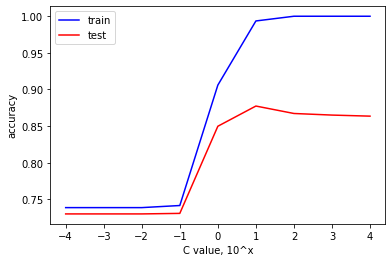

In [62]:
# Now we have our data Vectorized (i.e. a table numerical rows/columns)
# so we can build a model on it
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

train_accs = []
test_accs = []

for c in C_values:
    
    # Instantiate & fit the model
    logreg = LogisticRegression(C = c)
    logreg.fit(X_train, y_train)
    
    # Keep track of the train & test accuacies
    train_accs.append(logreg.score(X_train, y_train))
    test_accs.append(logreg.score(X_test, y_test))
    

# Visualize the train & test accuracies across c-values
plt.figure()
plt.plot(np.log10(C_values), train_accs, c='blue', label='train')
plt.plot(np.log10(C_values), test_accs, c='red', label='test')
plt.xlabel('C value, 10^x')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [63]:
# Refit the model with the best C-value (10^0, i.e. 1)
my_best_model = LogisticRegression(C=1)
my_best_model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
coefs = logreg.coef_
tokens = tfidf.get_feature_names()

results = pd.DataFrame({'tokens': tokens, 'coef': coefs[0]})
results.head()


,tokens,coef
0,1,-3.843304
1,1 month,-0.503441
2,10,-2.888382
3,10 minut,3.263758
4,10 year,1.909640


In [65]:
# Sort the rows by the coefficient of the word/token (from lowest to highest)
results.sort_values(by='coef', inplace=True)

# Display 20 most negative tokens
display(results.head(20))

# Display 20 most positive tokens
display(results.tail(20))

,tokens,coef
363,broke,-29.181081
2857,wast,-23.339356
2224,return,-22.630092
1960,poor,-22.177905
2588,terribl,-21.481426
564,combo,-20.882067
1311,horribl,-20.044951
2694,tri,-19.590113
2505,stop,-19.494058
1083,garbag,-18.809160


,tokens,coef
2344,shower,15.193948
949,far,15.420830
904,exactli,15.745794
1278,help,15.878171
2947,work perfectli,15.883985
2362,sinc,16.295050
2916,wish would,16.762873
843,easili,17.142658
581,complaint,17.566420
2955,work well,17.851988


#### Result: TFIDF Score

In [66]:
# Test Score
logreg.score(X_test,y_test)

0.8635703918722787

##### Confusion Matrix 

Here is the CM for our best model TFIDF

In [67]:
from sklearn.metrics import confusion_matrix

preds = logreg.predict(X_test)

con_mat = confusion_matrix(y_test,preds)
con_mat

array([[259, 113],
       [ 75, 931]])

In [69]:
# making the confusion matrix a bit more clear

df_con_mat = pd.DataFrame(con_mat, columns = ['Predicted 0','Predicted 1'],
                 index = ['True 0','True 1'])

df_con_mat

,Predicted 0,Predicted 1
True 0,259,113
True 1,75,931


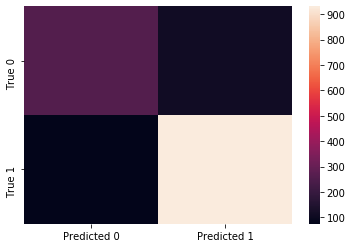

In [70]:
# heat map
sns.heatmap(df_con_mat)
plt.show()

##### Model Comparison and Tweaking

Compare the performance of CountVectorizer to TfidfVectorizer, with and without stemming and removing stop words. How does the performance differ in this case? When would it make a larger difference?

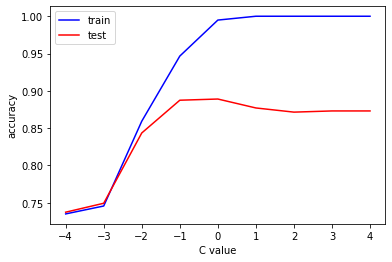

In [71]:
# Test CountVectorizer vs TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

bagofwords = CountVectorizer(min_df = 5)
bagofwords.fit(X_train)

X_train = bagofwords.transform(X_train)
X_test = bagofwords.transform(X_test)

C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

train_accs = []
test_accs = []

for c in C_values:
    logreg = LogisticRegression(C=c)
    logreg.fit(X_train, y_train)
    
    train_accs.append(logreg.score(X_train, y_train))
    test_accs.append(logreg.score(X_test, y_test))
    

plt.figure()
plt.plot(np.log10(C_values), train_accs, c='blue', label='train')
plt.plot(np.log10(C_values), test_accs, c='red', label='test')
plt.xlabel('C value')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Imposing a minimum document frequency of 5 (min_df=5), the top Test Set accuracy of the CountVectorizer data (above) is slightly lower than the top Test Set accuracy of the TfidfVectorizer (~80% back in question 2).

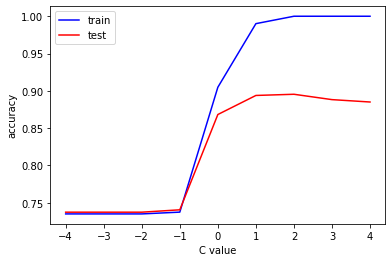

In [72]:
# Stemming vs No Stemming -- using the Porter Stemmer from the NLTK package
# (using Tfidf Vectorizer)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

stemmer = nltk.stem.PorterStemmer()

tfidf = TfidfVectorizer(min_df = 5, tokenizer = lambda x: [stemmer.stem(i) for i in x.split(' ')])
tfidf.fit(X_train)

X_train = tfidf.transform(X_train)
X_test = tfidf.transform(X_test)

C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

train_accs = []
test_accs = []

for c in C_values:
    logreg = LogisticRegression(C=c)
    logreg.fit(X_train, y_train)
    
    train_accs.append(logreg.score(X_train, y_train))
    test_accs.append(logreg.score(X_test, y_test))
    

plt.figure()
plt.plot(np.log10(C_values), train_accs, c='blue', label='train')
plt.plot(np.log10(C_values), test_accs, c='red', label='test')
plt.xlabel('C value')
plt.ylabel('accuracy')
plt.legend()
plt.show()

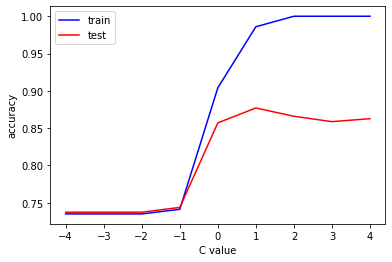

In [73]:
# Removing stop words vs not
# (using Tfidf Vectorizer, and without stemming the tokens)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

tfidf = TfidfVectorizer(min_df = 5, stop_words='english')
tfidf.fit(X_train)

X_train = tfidf.transform(X_train)
X_test = tfidf.transform(X_test)

C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

train_accs = []
test_accs = []

for c in C_values:
    logreg = LogisticRegression(C=c)
    logreg.fit(X_train, y_train)
    
    train_accs.append(logreg.score(X_train, y_train))
    test_accs.append(logreg.score(X_test, y_test))
    

plt.figure()
plt.plot(np.log10(C_values), train_accs, c='blue', label='train')
plt.plot(np.log10(C_values), test_accs, c='red', label='test')
plt.xlabel('C value')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [74]:
preds = logreg.predict(X_test)

con_mat = confusion_matrix(y_test,preds)
con_mat

array([[235,  94],
       [ 78, 846]])

#### Step 2: Advanced NLP

Now that we have the basics taken care of and we know which model preforms the best, let's set up our dataframes as taught by Kris